### NOTES 

* In Diagnosis column, M stands for Malignant and B stands for Benign tumor. Malignant tumor is the one that is cancerous and spreads quickly and spread to other parts of the body , while benign tumor is non-cancerous, grows slowly and does not spread around the body neither spread around the tissue of the tumor region    

### Steps to take 
* Import the dataset 
* remove the column(unnamed) which contains NAN values 
* check for null values in the rows ,remove or fill them respectively and check for duplicated rows .
* check for outliers and remove them.
* labeling on diagnosis column
* separate the dataset into x and y , dependent and independent variables 
* handling imbalanced dataset 
* perform feature scaling and feature selection 
* find the best algorithm !  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

##### IMPORTING DATASET

In [2]:
df = pd.read_csv("../dataset/breast_cancer_data.csv")

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
24,852552,M,16.650,21.38,110.00,904.6,0.11210,0.14570,0.152500,0.091700,...,31.56,177.00,2215.0,0.1805,0.35780,0.469500,0.20950,0.3613,0.09564,NaN
426,907409,B,10.480,14.98,67.49,333.6,0.09816,0.10130,0.063350,0.022180,...,21.57,81.41,440.4,0.1327,0.29960,0.293900,0.09310,0.3020,0.09646,NaN
466,9113455,B,13.140,20.74,85.98,536.9,0.08675,0.10890,0.108500,0.035100,...,25.46,100.90,689.1,0.1351,0.35490,0.450400,0.11810,0.2563,0.08174,NaN
333,897137,B,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,...,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418,NaN
503,915143,M,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.167600,0.100300,...,23.87,211.50,2782.0,0.1199,0.36250,0.379400,0.22640,0.2908,0.07277,NaN
267,8910499,B,13.590,21.84,87.16,561.0,0.07956,0.08259,0.040720,0.021420,...,30.04,97.66,661.5,0.1005,0.17300,0.145300,0.06189,0.2446,0.07024,NaN
539,921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.092520,0.013640,...,31.89,54.49,223.6,0.1596,0.30640,0.339300,0.05000,0.2790,0.10660,NaN
186,874217,M,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.058140,...,26.36,139.20,1410.0,0.1234,0.24450,0.353800,0.15710,0.3206,0.06938,NaN
368,9011971,M,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.084650,...,26.44,199.50,3143.0,0.1363,0.16280,0.286100,0.18200,0.2510,0.06494,NaN
552,924084,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,...,36.00,88.10,594.7,0.1234,0.10640,0.086530,0.06498,0.2407,0.06484,NaN


#### value counts of diagnosis

In [5]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

#### REMOVING THE NULL COLUMN (UNNAMED) and ID column, NO USES OF THEM ! 

In [6]:
df.drop(columns=["Unnamed: 32",'id'],inplace=True)

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### CHECKING FOR NULL AND DUPLICATED VALUES 

In [8]:
#checking for null values 
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# checking for duplicated values 
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<p>Separating the dataset into dependent and independent variables </p>

In [12]:
x = df.iloc[:,1:]
y = df["diagnosis"]

In [13]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [17]:
scaled_x = pd.DataFrame(ss.transform(x),columns=x.columns)

In [18]:
scaled_x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [19]:
len(scaled_x.columns)

30

Here, there are total of 30 columns, so we are dividing into each 10 columns and creating violinplot and boxplot of it .

In [20]:
first_ten_temp_df = pd.concat([y,scaled_x.iloc[:,0:10]],axis=1)

In [21]:
first_ten_temp_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


melting the first 10 to create the graphs such that i can visualize the outliers and their relations to more detail ! 

In [22]:
first_ten_melted_df = pd.melt(first_ten_temp_df,id_vars="diagnosis",var_name="features")

In [23]:
first_ten_melted_df

,diagnosis,features,value
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888
3,M,radius_mean,-0.768909
4,M,radius_mean,1.750297
...,...,...,...
5685,M,fractal_dimension_mean,-0.931027
5686,M,fractal_dimension_mean,-1.058611
5687,M,fractal_dimension_mean,-0.895587
5688,M,fractal_dimension_mean,1.043695


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

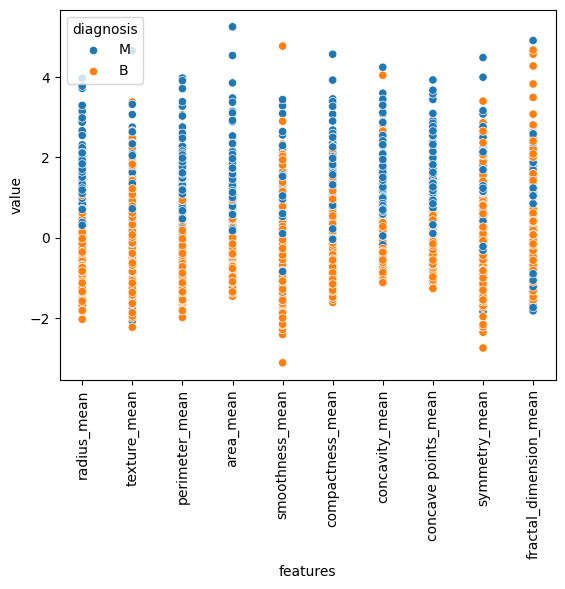

In [24]:
sns.scatterplot(x="features",y="value",data=first_ten_melted_df,hue="diagnosis")
plt.xticks(rotation=90)

From the above graph we can see that there is higher chances of cancer when the values are higher except for fractal_dimension_mean and symmetry_mean ! , we will soon look upon the relation of this feature using heatmap ! 


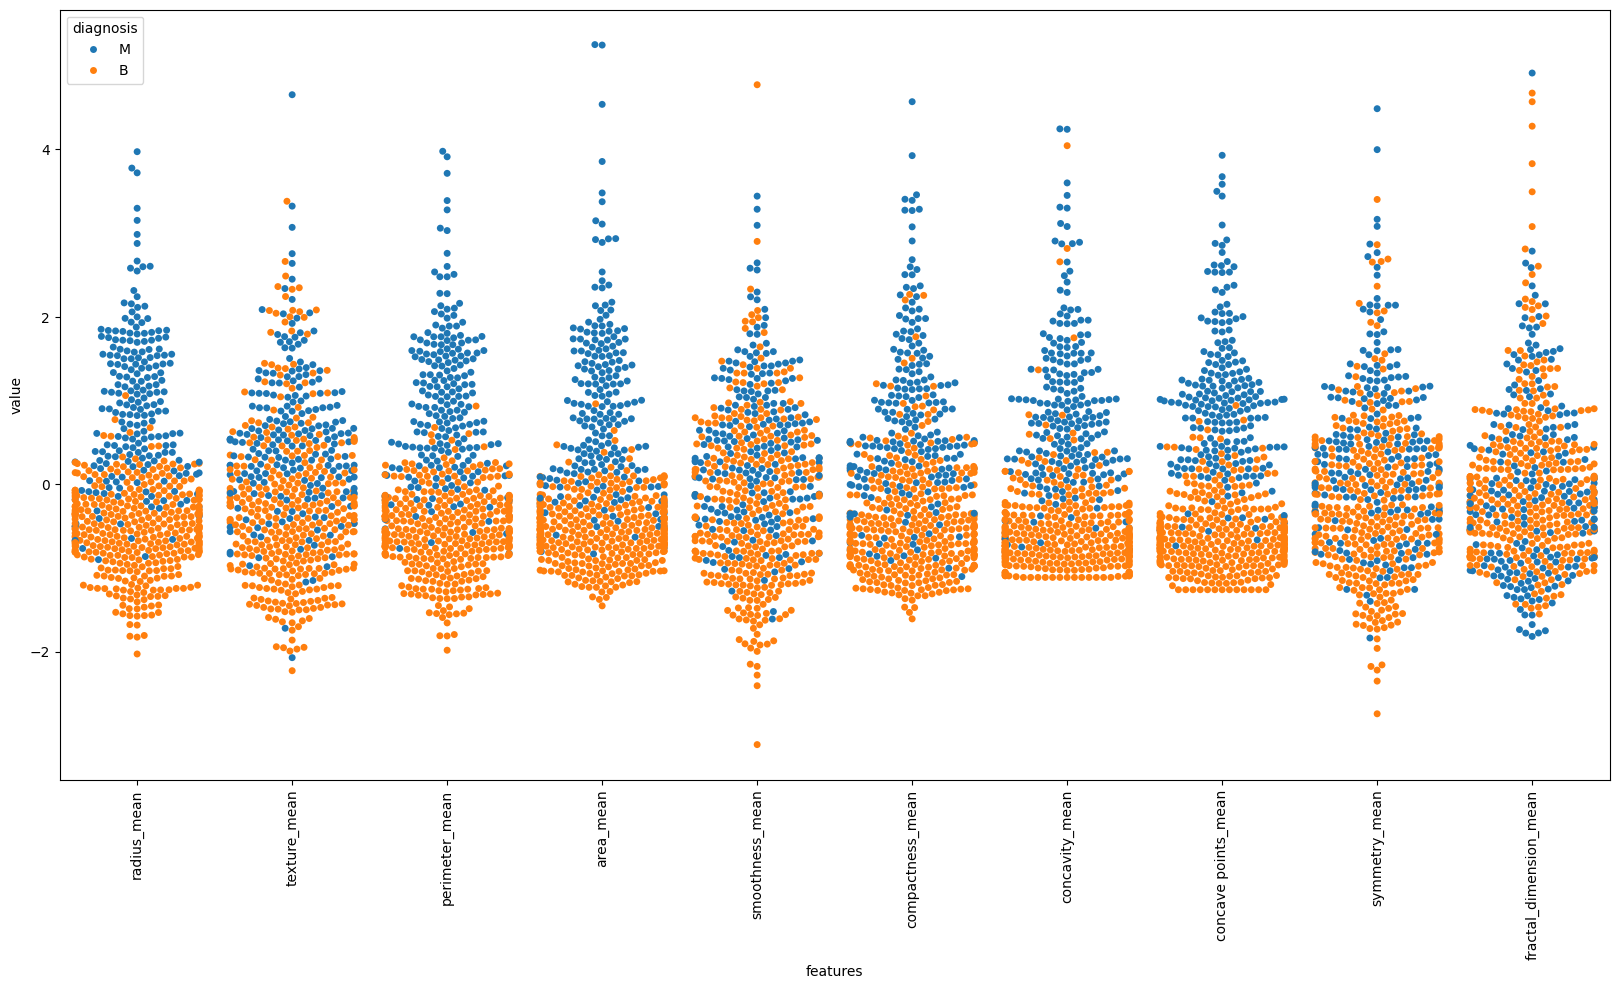

In [25]:
plt.figure(figsize=(20,10))
sns.swarmplot(data=first_ten_melted_df,x="features",y="value",hue="diagnosis")
# plt.yticks()
plt.xticks(rotation=90)
plt.show()

Again here using swarmplot we can clearly see that most of the malignant cancer has the higher value of more than 2 , so , the only bit of exception seems to be symmetry_mean and fractal_dimension_mean

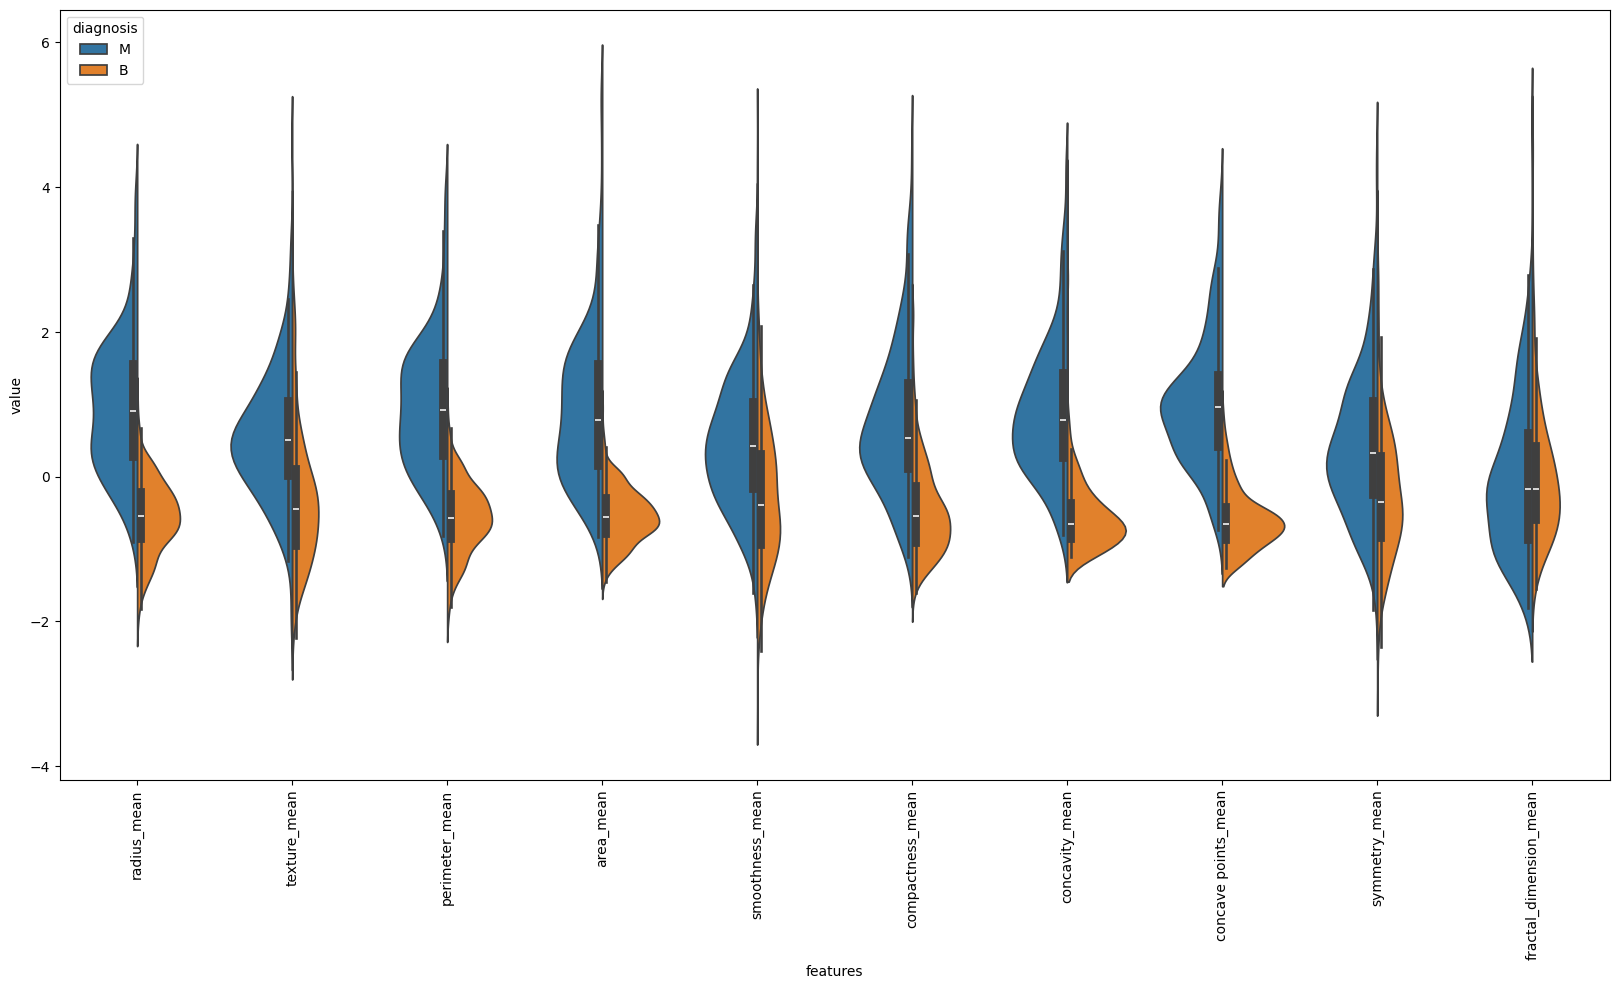

In [26]:
plt.figure(figsize=(20,10))
sns.violinplot(data=first_ten_melted_df,x="features",y="value",hue="diagnosis",split=True,inner="box")
plt.xticks(rotation=90)
plt.show()

here, from the above graph , fractal_dimension_mean seems to have the same median dataset , which is not quite good for classification ! 

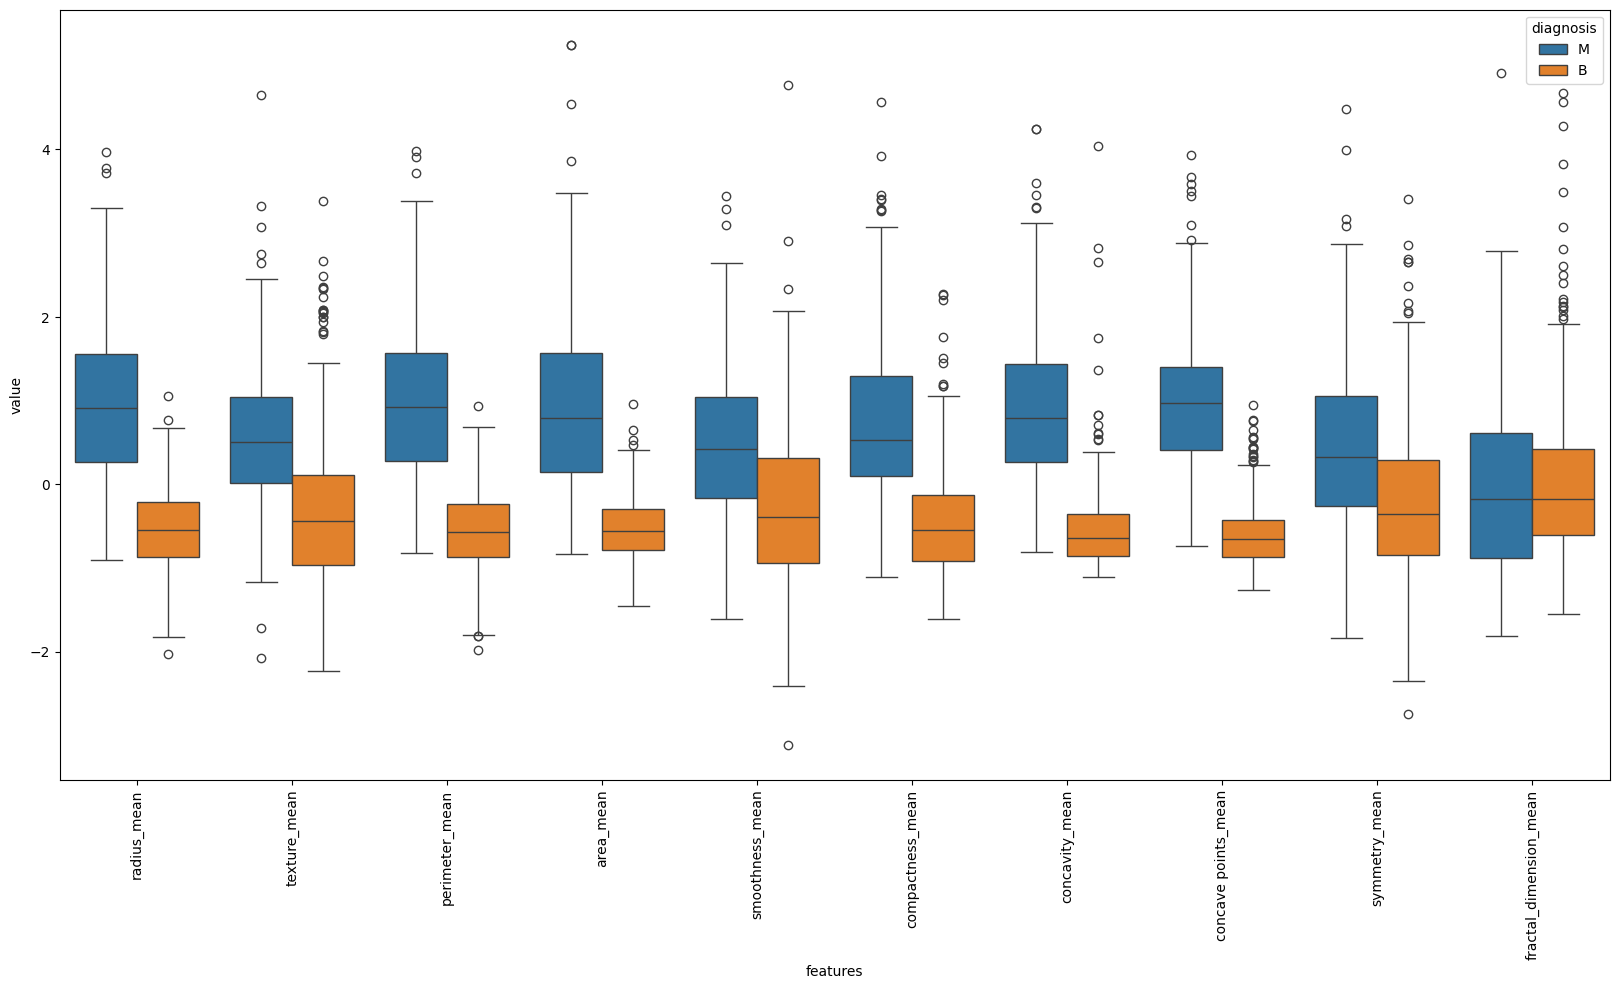

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(data=first_ten_melted_df,x="features",y="value",hue="diagnosis")
plt.xticks(rotation=90)
plt.show()

### REMOVING OUTLIERs

In [28]:
q1 = first_ten_melted_df["value"].quantile(0.25)
q3 = first_ten_melted_df["value"].quantile(0.75)
IQR = q3 - q1 
min_range = q1 - (IQR*1.5)
max_range = q3 + (IQR*1.5)

In [29]:
min_range,max_range

(-2.57865898950356, 2.391181108816987)

In [30]:
filtered_df = first_ten_melted_df[(first_ten_melted_df["value"]>= min_range) & (first_ten_melted_df["value"]<= max_range)] 

Now again , checking in the box plot  

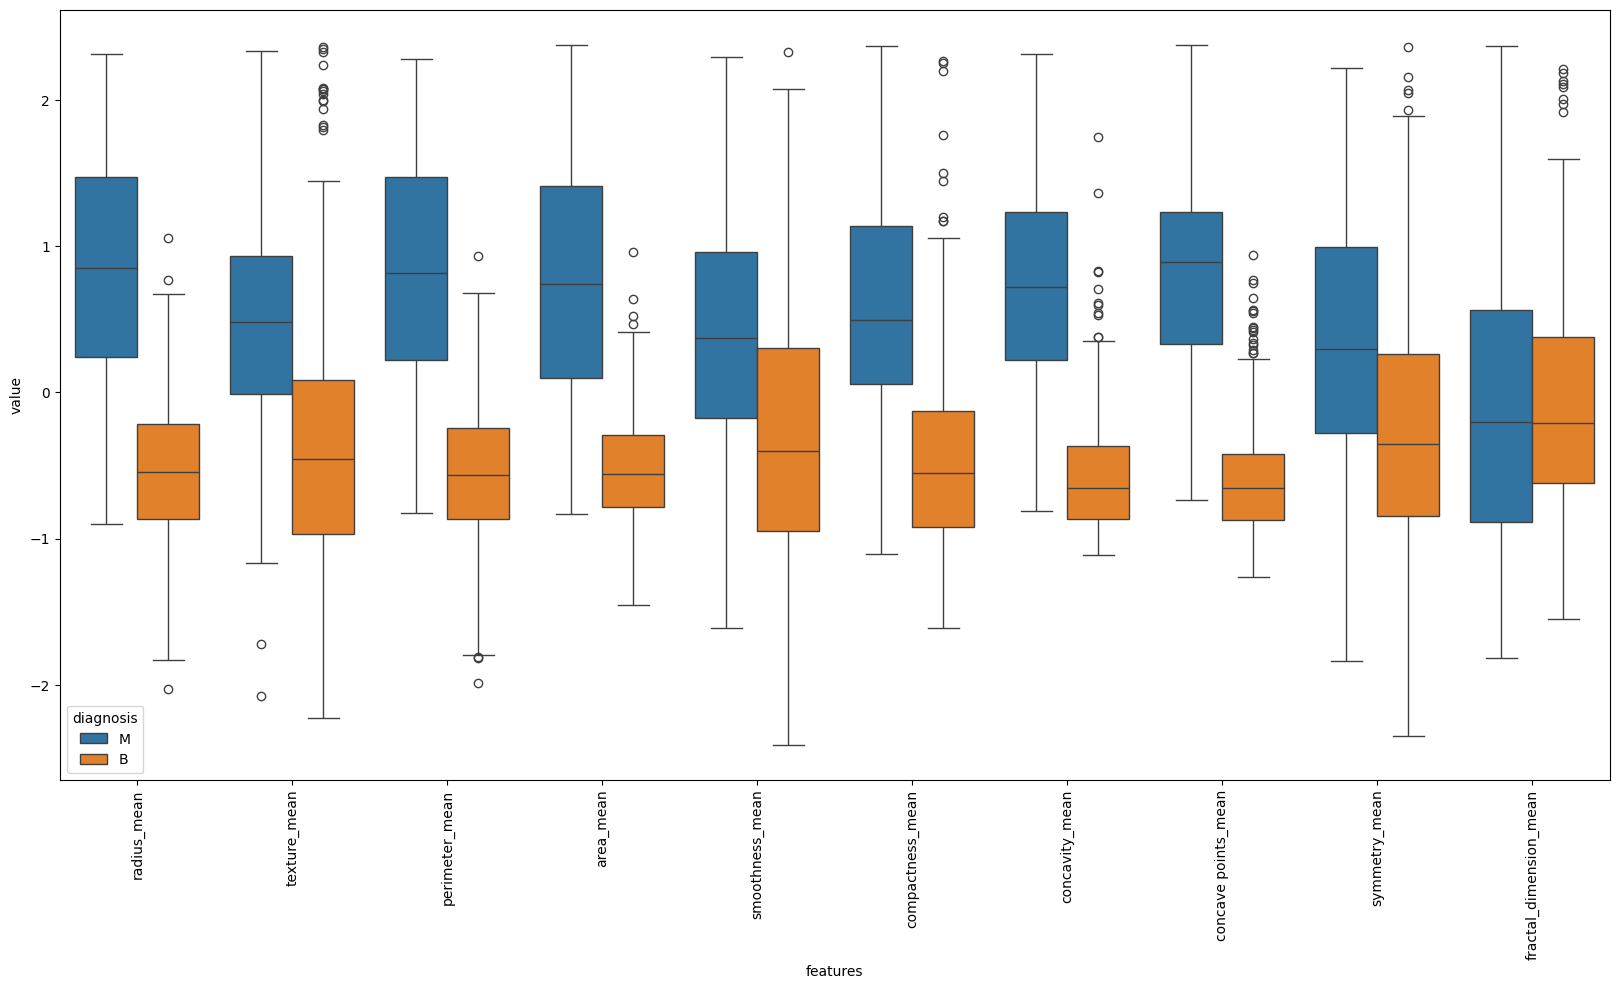

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data=filtered_df,x="features",y="value",hue="diagnosis")
plt.xticks(rotation=90)
plt.show()

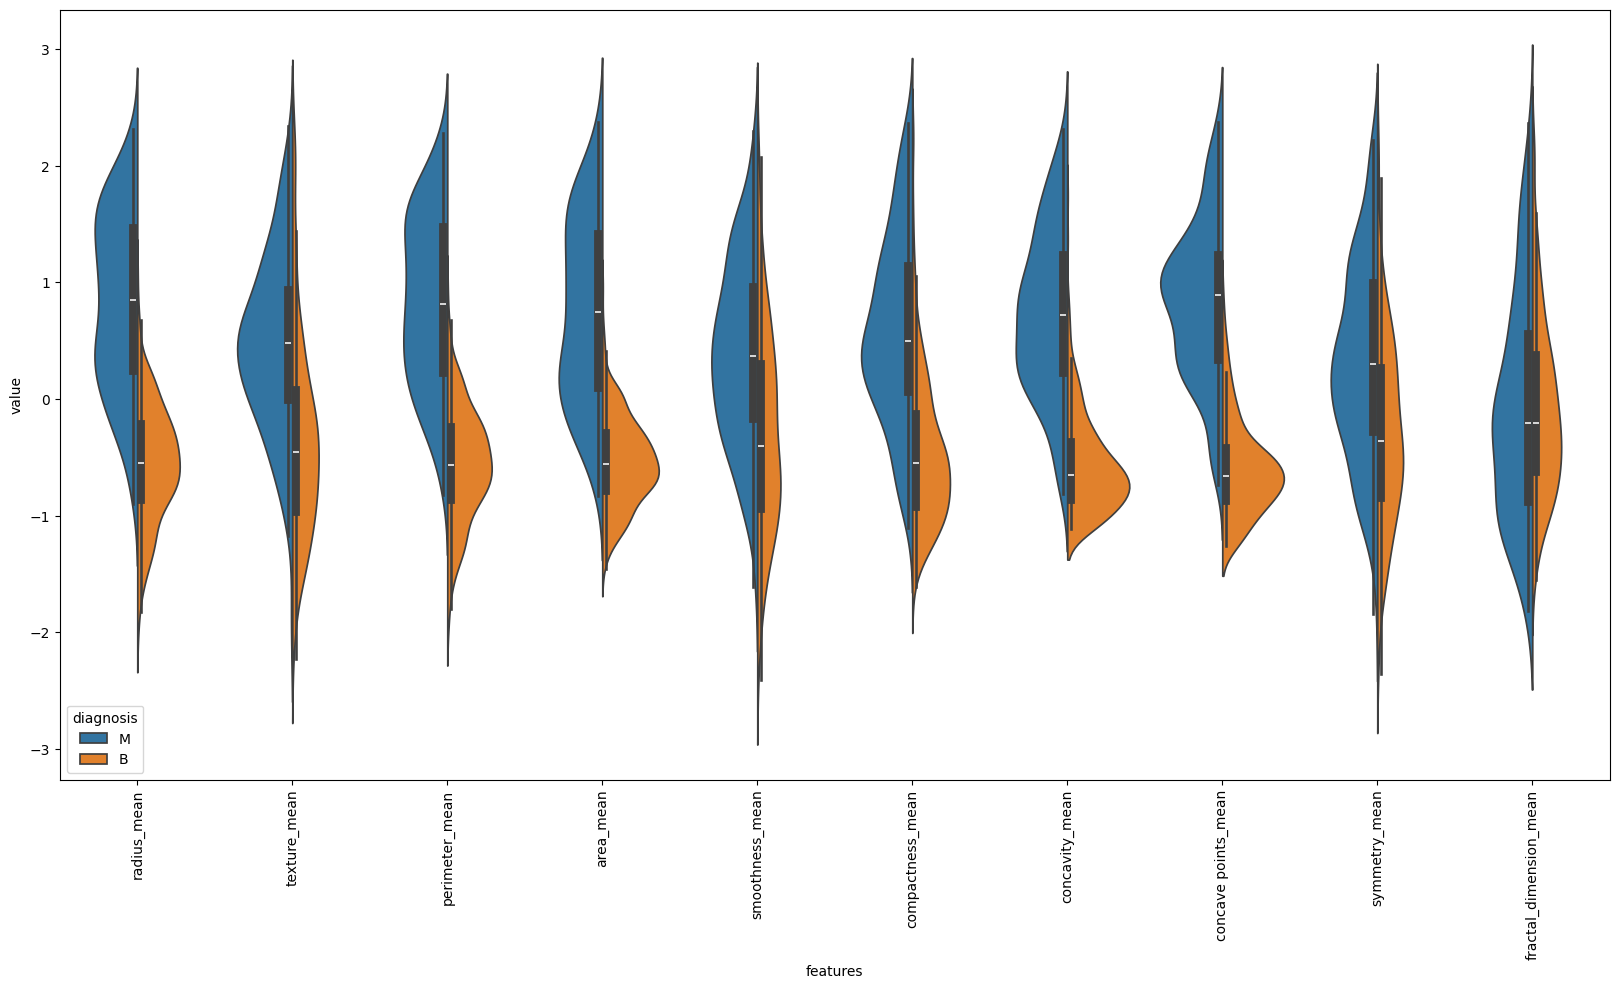

In [32]:
# after removing  most of the outliers , the data seems to be more in range to perform analysis and build a machine learning model on top of it ! now lets have look at the violin plot also ! 
plt.figure(figsize=(20,10))
sns.violinplot(data=filtered_df,x="features",y="value",hue="diagnosis",split=True,inner="box")
plt.xticks(rotation=90)
plt.show()

Violin plot also seems to be better than before :)

In [33]:
filtered_df.head()

,diagnosis,features,value
0,M,radius_mean,1.097064
1,M,radius_mean,1.829821
2,M,radius_mean,1.579888
3,M,radius_mean,-0.768909
4,M,radius_mean,1.750297


In [34]:
filtered_df["features"].value_counts()

features
texture_mean              560
smoothness_mean           560
radius_mean               557
perimeter_mean            556
area_mean                 555
fractal_dimension_mean    555
compactness_mean          554
symmetry_mean             554
concave points_mean       551
concavity_mean            550
Name: count, dtype: int64

In [35]:
first_ten_temp_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


Since, from the above swarm and violin plot , we now sure know that the column fractal_dimension_mean does not play a significant role in the building machine learning model , so we can remove it , but first lets check using selectKBest feature selection methods , which can help us get out of our doubts ! 

In [36]:
# splitting the data into dependent and independent variables 
x = first_ten_temp_df.iloc[:,1:]
y = first_ten_temp_df["diagnosis"]


<p>Removing Outliers USING IQR and Quantile methods  </p>

In [37]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean
columns_to_clean = ["radius_mean","texture_mean","perimeter_mean"	,"area_mean"	,"smoothness_mean","compactness_mean"	,"concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]
cleaned_df = remove_outliers_iqr(x, columns_to_clean)

In [38]:
cleaned_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332
...,...,...,...,...,...,...,...,...,...,...
558,0.131416,0.788958,0.182100,0.006288,-0.827674,0.543131,0.177034,-0.298156,-1.305645,-0.188203
559,-0.743348,1.079841,-0.718729,-0.714976,-0.266890,-0.042470,0.281240,-0.202977,-1.546608,0.411444
560,-0.021952,1.829157,-0.024262,-0.154973,0.208495,0.156521,-0.554670,-0.151647,-1.002617,-0.154180
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611


<p>Now using feature selection process with selectKBest</p>

In [39]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=9)
x_new = selector.fit_transform(x, y)

In [40]:
selector.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'], dtype=object)

<p>Here as you can see that the fractal_dimension_mean has been ruled out,as predicted before while using selectKBest feature selection. Lets use f_classif to make sure ! </p>

In [41]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif,f_classif 
selector = SelectKBest(score_func=f_classif,k=9)
x_new = selector.fit_transform(x,y)

In [42]:
selector.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'], dtype=object)

<p>You can see it here too, the fractal_dimension_mean has been ruled out , hence it proved our points </p>
<p>But lets just find the best 5 features to work on from the first 10 features of the original dataset and predict the outcome using different classification algorithm ! </p>

#### USING MUTUAL_INFO_CLASSIF FROM SELECTKBEST

In [43]:
# from sklearn.feature_selection import SelectKBest,mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=5)
x_new_for_prediction = selector.fit_transform(x, y)

In [44]:
selector.get_feature_names_out()

array(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean'], dtype=object)

In [45]:
### PUTTING THOSE SELECTED FEATURES IN THE LIST 
selected_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean']

In [46]:
### FILTERING THE COLUMNS WITH THE SELECTED FEATURES 
selected_new_x = x[selected_features]

In [47]:
selected_new_x

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean
0,1.097064,1.269934,0.984375,2.652874,2.532475
1,1.829821,1.685955,1.908708,-0.023846,0.548144
2,1.579888,1.566503,1.558884,1.363478,2.037231
3,-0.768909,-0.592687,-0.764464,1.915897,1.451707
4,1.750297,1.776573,1.826229,1.371011,1.428493
...,...,...,...,...,...
564,2.110995,2.060786,2.343856,1.947285,2.320965
565,1.704854,1.615931,1.723842,0.693043,1.263669
566,0.702284,0.672676,0.577953,0.046588,0.105777
567,1.838341,1.982524,1.735218,3.296944,2.658866


<p>Since we have new top 5 selected features , we will starting using machine learning model on those datasets of new selected x_features and the outcomes(y)</p>

#### SPLITTING THE DATA INTO TRAINING AND TESTING DATASETS

In [48]:
x_train,x_test,y_train,y_test  = train_test_split(selected_new_x,y,random_state=42,test_size=0.2)

# LOGISTIC REGRESSION (FIRST)

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(selected_new_x,y)

LogisticRegression()

In [50]:
lr.score(x_test,y_test)

0.9298245614035088

In [51]:
lr.score(x_train,y_train)

0.9120879120879121

### PLOTTING METRICS 


In [52]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score,confusion_matrix

In [53]:
cm = confusion_matrix(y_test,lr.predict(x_test))

In [54]:
cm

array([[68,  3],
       [ 5, 38]], dtype=int64)

<Axes: >

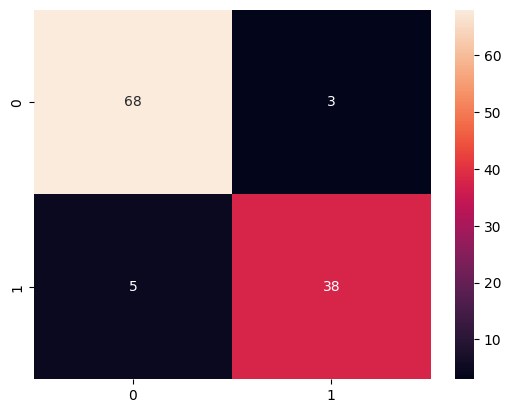

In [59]:
sns.heatmap(cm,annot=True,fmt=".2g")

In [62]:
ps = precision_score(y_test,lr.predict(x_test),pos_label="M") * 100

In [63]:
ps

92.6829268292683

In [64]:
rs = recall_score(y_test,lr.predict(x_test),pos_label="M") * 100

In [65]:
rs

88.37209302325581

In [66]:
fs = f1_score(y_test,lr.predict(x_test),pos_label="M") * 100

In [67]:
fs

90.47619047619048